In [65]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.optimize import fsolve


from sympy import symbols
from sympy.physics.wigner import wigner_3j
import module1 as m1 # module1 contains the function to convert r_star to r\n",

import cmath
from astropy.io import fits
 
M = 1.e21 #also in planck units
T = 1/(8*np.pi*M)
omegas = np.linspace(.01*T,20*T,2000)

print(omegas[0],omegas[-1])
print(omegas[0]-omegas[1])

import I_functions_class as Inp

X = 1
k = 2
X_prime = 1
k_prime = 3
X_gamma = 1
l = 1
parity = 1
h =3.8e-23  #h and h_prime should be on the same order but smaller than mu
h_prime = 3.9e-23
omega = 4.e-25  #should be much much less than 1/r but lowest one is only ~ 1/r i think -> want to ask about this 
               #5.069927873444599e-25 is the smallest 1/r here but it seems as
n = 1

from imp import reload
reload(Inp)

3.978873577297383e-25 7.957747154594767e-22
-3.978873577297383e-25


<module 'I_functions_class' from '/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py'>

In [2]:
(h_prime - 4.1796514508e-23 )/4.1796514508e-23  #want this to be much much less than 1 

-0.06690784006558102

In [3]:
#omega*rlhs[0] #want this to be much much less than 1 

In [3]:
h-h_prime

-9.999999999999986e-25

In [4]:
mu = 4.1796514508e-23

In [5]:
kappa = np.sqrt(2*4.1796514508e-23*(4.1796514508e-23-h))
kappa/mu

0.426223603438147

In [7]:
#start electric dipole

In [2]:
#IfunctionsNoM(X,k,X_prime,k_prime,X_gamma,l,parity,h,h_prime,omega,M,n)
tryA2=Inp.IfunctionsNoM(X,k,X_prime,k_prime,X_gamma,l,parity,h,h_prime,omega,M,n)

In [7]:
#IBarplusplusevenfunc(self,X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,lim1,lim2)
#set1_2 = tryA2.IBarplusplusevenfunc(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,1.,2.)

direcPhoton = '/fs/scratch/PCON0003/emily/PhotonWaveFunctionFits/'
        
hdu = fits.open(direcPhoton+str(l)+'.fits')
        
r_points_gamma_Hdu = hdu[tryA2.omega_index].data.field('rpoints_up')

rdata = r_points_gamma_Hdu.data

hdu[-1].header

r_points_gamma_Hdu

direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'

hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')

r_points = hdu[-1].data.field('rpoints_up')

r_points

In [59]:
r_initial = 2000.*M
r_final= -70.*M
tol = 1.e-10

In [60]:
PWF = Inp.PhotonWaveFunction(M, omega, l, tol)
r_gamma, F_points_gamma, z_points_gamma, f_points_gamma_prime = PWF.RK_4(r_initial, r_final, 240000, up = True)
r_gamma_in, F_points_gamma_in, z_points_gamma_in, f_points_gamma_prime_in = PWF.RK_4(r_final, r_initial, 240000, up = False)
Rgamma, Tgamma = PWF.get_R_and_T_coeff(r_gamma,F_points_gamma,z_points_gamma,r_gamma_in,F_points_gamma_in,z_points_gamma_in)

fpoints0 is (1+0j)
normalized using rup neg infinity:-7e+22
(3.304797334205975e-07-7.78409988467647e-07j)
fpoints0 renormalized is (3.304797334205975e-07-7.78409988467647e-07j)
fpoints0 is (1+0j)
is this rstar infinity: 2e+24
(-3.062008609082574e-07-7.882765993780345e-07j)
fpoints0 renormalized is (-3.062008609082574e-07-7.882765993780345e-07j)
rin negative infinity-7e+22
compare T:(7.151389643479515e-13, 7.151389643479564e-13)
rstar up used 2e+24
t phase is -1.9693006115629188
rstar used :-7e+22


In [8]:
#F_points_gamma_in = F_points_gamma_in[::-1]
#len(F_points_gamma_in)
print(r_gamma[::2][113207]/M)


47.171113212971676


/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


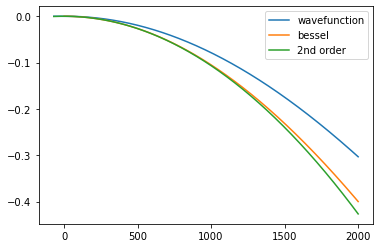

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


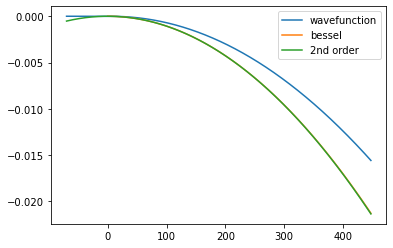

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


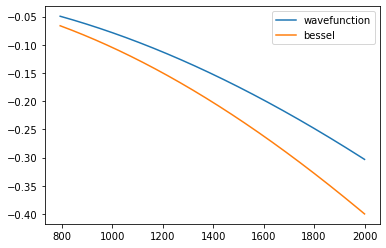

In [9]:
import scipy as sci

psi_d4 = sci.special.spherical_jn(1, omega*r_gamma_in, derivative=False)


plt.plot(r_gamma_in/M,F_points_gamma_in,label='wavefunction')
plt.plot(r_gamma_in/M,psi_d4*-2*omega*r_gamma_in,label='bessel')
plt.plot(r_gamma_in/M,-2*(omega**2*r_gamma_in**2)/3,label='2nd order')
plt.legend()
plt.show()


plt.plot(r_gamma_in[:60000]/M,F_points_gamma_in[:60000],label='wavefunction')
plt.plot(r_gamma_in[:60000]/M,psi_d4[:60000]*-2*omega*r_gamma_in[:60000],label='bessel')
plt.plot(r_gamma_in[:60000]/M,-2*(omega**2*r_gamma_in[:60000]**2)/3,label='2nd order')
plt.legend()
plt.show()

plt.plot(r_gamma_in[100000:]/M,F_points_gamma_in[100000:],label='wavefunction')
plt.plot(r_gamma_in[100000:]/M,psi_d4[100000:]*-2*omega*r_gamma_in[100000:],label='bessel')
#plt.plot(r_gamma_in/M,-2*(omega**2*r_gamma_in**2)/3,label='2nd order')
plt.legend()
plt.show()


In [53]:
toplen = 28251 #for 1500M

In [11]:
#lentest = 113043 #for 50M  specifically 43
#lentest = 113043 -3000 #for 94M 
#lentest = 86316 #for 500M

#lentest = 114343 #for 27.57M

#lentest = 115043 #for 15M
#lentest = 115243   #for 12.05M
#lentest = 115343  #for 10.3249596873322M
lentest = 115403
#lentest = 115543# FOR 6.87M

In [12]:
def rhs(h,h_prime,omega,k,k_prime,M,r_initial, r_final,lentest): 
    
    nu = 1.
    mu =4.1796514508e-23 #planck units 
    lam = 1.
    GC = 1.
    c = 1.
    tol = 1.e-10
    step_size_for_inte = 1*240000
        
    first_coeff = omega*((h-h_prime)**2)/(36*np.pi*mu**2)
    brac = 0 
    
    #L=j-1/2*s
    
    j=(np.abs(k) - 1/2)
    j_prime = (np.abs(k_prime) - 1/2)
    
    s=0
    s_prime=0
        
    if k !=0:
        s= (k/np.abs(k))
    if k_prime!=0:
        s_prime=k_prime/np.abs(k_prime)
        
    L=j-.5*s
    L_prime=j_prime -.5*s_prime 
    print(L,L_prime)
    
    if np.abs(L_prime-(L+1))<tol:
        brac = (L+1)/(2*L+1)
    elif np.abs(L_prime-(L-1))<tol: 
        brac = L/(2*L+1)
    else: 
        brac=0.
    
    print(first_coeff,brac)
    #try0 = ElectronWaveFunction(nu, h, k, mu, M, lam, GC, c, tol)
    #r_points,F_points_xkh, G_points_xkh = try0.RK_4(r_initial, r_final, step_size_for_inte, up = True)
    
    #try1 = ElectronWaveFunction(nu, h_prime, k_prime, mu, M, lam, GC, c, tol)
    #r_points,F_points_xkprimehprime, G_points_xkprimehprime = try1.RK_4(r_initial, r_final, step_size_for_inte, up = True)
    
    
    omega_index = round(omega*100*(8*np.pi*M) -1)
    print(omega_index)
    h_index = round(h*100*(8*np.pi*M) -1)
    h_prime_index = round(h_prime*100*(8*np.pi*M) -1)
    
    
    direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'
    if k>0:
        hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')
    else:
        hdu = fits.open(direcElectron+'min'+str(np.abs(k))+'ExtendedOmega.fits')

    #r_points_star = hdu[h_index].data.field('rpoints_up')
    #this is in rstar, should I switch to r? gonna try it 
    
    #r_points = np.array([m1.r_star_to_r(x,M,tol) for x in r_points_star])
    
    #back to using rstar
    r_points = hdu[h_index].data.field('rpoints_up')
     
    F_points_xkh = hdu[h_index].data.field('F_points_up')
    G_points_xkh = hdu[h_index].data.field('G_points_up')
    
    
    
    
    
    r = np.array([m1.r_star_to_r(x,M,tol) for x in r_points[toplen:lentest]])
    
    plt.plot(r,r_points[toplen:lentest],label='rstar')
    plt.plot(r,r, label='r')
    plt.legend()
    plt.xlabel('r')
    plt.xlim([.5e24,.7e24])
    plt.ylim([.5e24,.7e24])
    plt.title('R to Rstar convergence')
    plt.show()
    
    plt.plot(r,r/r_points[toplen:lentest],label='r/rstar')
    #plt.plot(r,r, label='r')
    plt.legend()
    plt.xlabel('r')
    plt.xlim([.5e24,1.7e24])
    #plt.ylim([.5e24,.7e24])
    plt.title('R to Rstar convergence')
    plt.show()


    
   
    if k_prime>0:
        hdu = fits.open(direcElectron+str(k_prime)+'ExtendedOmega.fits')
    else:
        hdu = fits.open(direcElectron+'min'+str(np.abs(k_prime))+'ExtendedOmega.fits')

    #r_points = hdu[self.h_index+1]['rpoints_up']
    F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_up')
    G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_up')
    
    df_xkh_dr =[]
    df_xkh_prime_dr =[]
    rstar_step = r_points[0]-r_points[1]
    
    for i in range(toplen,lentest-1,1):
        df_xkh_dr.append( (F_points_xkh[i-1]-F_points_xkh[i+1])/(rstar_step*2)) 
        df_xkh_prime_dr.append( (F_points_xkh_prime[i-1]-F_points_xkh_prime[i+1])/(rstar_step*2))
    
    r = np.array([m1.r_star_to_r(x,M,tol) for x in r_points[:lentest]])
    df_xkh_dr_nostar =[]
    df_xkh_prime_dr_nostar =[]
    r_step = r[0]-r[1]
    for i in range(toplen,lentest-1,1):
        df_xkh_dr_nostar.append( (F_points_xkh[i-1]-F_points_xkh[i+1])/(r_step*2)) 
        df_xkh_prime_dr_nostar.append( (F_points_xkh_prime[i-1]-F_points_xkh_prime[i+1])/(r_step*2))
    
    
    print('len of derivatives ')
    print(len(df_xkh_dr))
    """    
    plt.plot(r_points[:lentest]/M,G_points_xkh[:lentest],label='g')
    plt.plot(r_points[1:lentest-1]/M, (k*F_points_xkh[1:lentest-1]/r_points[1:lentest-1] - df_xkh_dr)/(2*mu),label='F')
    plt.legend()
    plt.title('XKH')
    plt.ylim(-1.e-18,5.e-18)
    plt.show()

    plt.plot(r_points[:lentest]/M,G_points_xkh_prime[:lentest],label='g')
    plt.plot(r_points[1:lentest-1]/M, (k*F_points_xkh_prime[1:lentest-1]/r_points[1:lentest-1] - df_xkh_prime_dr)/(2*mu),label='F')
    plt.legend()
    plt.title('XKH_Prime')
    plt.ylim(-1.e-18,5.e-18)
    plt.show()
    """
    
    #This is in rstar calculation
    
    
    print('rstarmax and rstarmin')
    print(r_points[toplen], r_points[lentest]/M)
    """         
    print('Here is the surface term!')
    print((k-k_prime)*(np.conjugate(F_points_xkh[toplen])*F_points_xkh_prime[toplen] - np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest]))
    print('surface term squared')
    print((k-k_prime)*(np.conjugate(F_points_xkh[toplen])*F_points_xkh_prime[toplen] - np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest])*np.conjugate((k-k_prime)*(np.conjugate(F_points_xkh[0])*F_points_xkh_prime[0] -np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest])))
    
    surface_term= (k-k_prime)*(np.conjugate(F_points_xkh[toplen-1])*F_points_xkh_prime[toplen-1] - np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest])
    
    surface_term_2 = - r_points[toplen-1]*(np.conjugate(F_points_xkh[toplen-1])*df_xkh_dr[0] - F_points_xkh[toplen-1]*np.conjugate(df_xkh_prime_dr[0])) + r_points[lentest-1]*(np.conjugate(F_points_xkh[lentest-1])*df_xkh_dr[-1] - F_points_xkh[lentest-1]*np.conjugate(df_xkh_prime_dr[-1]))  

    print('surface term 2')
    print(surface_term_2)
    
    print(df_xkh_dr[0],df_xkh_dr[-1])
    """
    
    #This is in r 
    print('Here is the surface term!')
    print((k-k_prime)*(np.conjugate(F_points_xkh[toplen])*F_points_xkh_prime[toplen] - np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest]))
    #print('surface term squared')
    #print((k-k_prime)*(np.conjugate(F_points_xkh[toplen])*F_points_xkh_prime[toplen] - np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest])*np.conjugate((k-k_prime)*(np.conjugate(F_points_xkh[0])*F_points_xkh_prime[0] -np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest])))
    
    surface_term= (k-k_prime)*(np.conjugate(F_points_xkh[toplen-1])*F_points_xkh_prime[toplen-1] - np.conjugate(F_points_xkh[lentest])*F_points_xkh_prime[lentest])
    
    surface_term_2 = - r[toplen-1]*(np.conjugate(F_points_xkh[toplen-1])*df_xkh_dr_nostar[0] - F_points_xkh[toplen-1]*np.conjugate(df_xkh_prime_dr_nostar[0])) + r[lentest-1]*(np.conjugate(F_points_xkh[lentest-1])*df_xkh_dr_nostar[-1] - F_points_xkh[lentest-1]*np.conjugate(df_xkh_prime_dr_nostar[-1]))  

    
    
    print((F_points_xkh[0]))
    print((F_points_xkh_prime[0]))
    print()
    print(r_points[86316]/M)
    dr = r_points[0]-r_points[1]
    print(dr)
    inte = 0 
    
    integ = []
    integ_sur =[]
    p =0
    #with rstar 
    """
    for i in range(toplen,lentest-1,1):
        inte += .5*(np.conjugate(F_points_xkh[i])*(F_points_xkh_prime[i])*r_points[i] + np.conjugate(F_points_xkh[i+1])*(F_points_xkh_prime[i+1])*r_points[i+1])*dr
        integ.append(inte)
        
        surface_term_test= (k-k_prime)*(np.conjugate(F_points_xkh[toplen-1])*F_points_xkh_prime[toplen-1] - np.conjugate(F_points_xkh[i])*F_points_xkh_prime[i])
    
        surface_term_2_test = - r_points[toplen-1]*(np.conjugate(F_points_xkh[toplen-1])*df_xkh_dr[0] - F_points_xkh[toplen-1]*np.conjugate(df_xkh_prime_dr[0])) + r_points[i-1]*(np.conjugate(F_points_xkh[i-1])*df_xkh_dr[p] - F_points_xkh[i-1]*np.conjugate(df_xkh_prime_dr[p]))  
        p+=1
        #integ_sur.append(inte + surface_term_test/(2*mu*(h-h_prime))+surface_term_2_test/(2*mu*(h-h_prime)) )
        integ_sur.append(inte + surface_term_test/(2*mu*(h-h_prime)) )
    """ 
    #with r
    dr = r[0]-r[1]
    print(dr)
    for i in range(toplen,lentest-1,1):
        inte += .5*(np.conjugate(F_points_xkh[i])*(F_points_xkh_prime[i])*r[i] + np.conjugate(F_points_xkh[i+1])*(F_points_xkh_prime[i+1])*r[i+1])*dr
        integ.append(inte)
        
        surface_term_test= (k-k_prime)*(np.conjugate(F_points_xkh[toplen-1])*F_points_xkh_prime[toplen-1] - np.conjugate(F_points_xkh[i])*F_points_xkh_prime[i])
    
        surface_term_2_test = - r[toplen-1]*(np.conjugate(F_points_xkh[toplen-1])*df_xkh_dr_nostar[0] - F_points_xkh[toplen-1]*np.conjugate(df_xkh_prime_dr[0])) + r[i-1]*(np.conjugate(F_points_xkh[i-1])*df_xkh_dr_nostar[p] - F_points_xkh[i-1]*np.conjugate(df_xkh_prime_dr_nostar[p]))  
        p+=1
        integ_sur.append(inte + surface_term_test/(2*mu*(h-h_prime))+surface_term_2_test/(2*mu*(h-h_prime)) )
        #integ_sur.append(inte + surface_term_test/(2*mu*(h-h_prime)) )

    #print(inte)
    
    plt.loglog(r_points[toplen:lentest-1]/M,np.abs(integ*np.conjugate(integ)*brac*first_coeff))
    #plt.xlim(100000,130000)
    plt.xlabel('r_points')
    plt.ylabel('Integral RHS not squared')
    plt.show()
    print(inte, surface_term/(2*mu*(h-h_prime)),surface_term_2/(2*mu*(h-h_prime)) )
    return np.conjugate(inte)*inte*brac*first_coeff, np.abs(integ*np.conjugate(integ)*brac*first_coeff), np.conjugate(inte+surface_term/(2*mu*(h-h_prime))+surface_term_2/(2*mu*(h-h_prime)))*(inte+surface_term/(2*mu*(h-h_prime))+surface_term_2/(2*mu*(h-h_prime)))*brac*first_coeff,np.abs(integ_sur*np.conjugate(integ_sur)*brac*first_coeff)
    #return np.conjugate(F_points_xkh)*(F_points_xkh_prime)*r_points*dr


1.0 2.0
2.0245452341896334e-30 0.6666666666666666
0


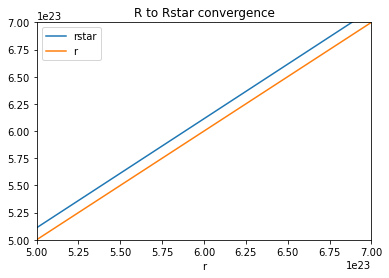

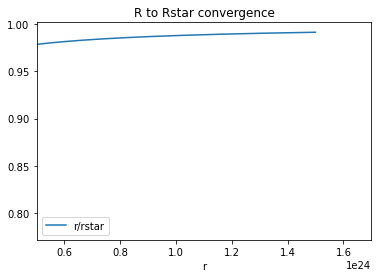

len of derivatives 
87151
rstarmax and rstarmin
1.5126682194509144e+24 9.289955374814078
Here is the surface term!
(1.3320077997525786e-29-1.0454227320930749e-30j)
(-2.5322208815324926e-31-8.432065976059953e-31j)
(-1.810413074839983e-32-4.66677405818045e-32j)

511.04279601165007
1.725007187534676e+19
1.7232701878697984e+19


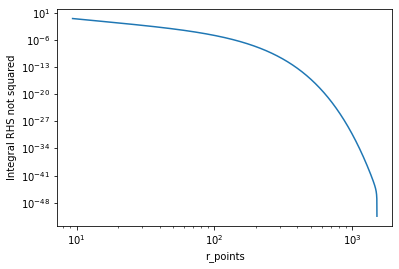

(527533295817825.44-41403308560683.86j) (-1.593443634513626e+17+1.2506099424785512e+16j) (2.9051439226119537e+18-2.309725964808287e+16j)


In [13]:
right2,right2plot,right2withsurface,right2plotwithsurface = rhs(h,h_prime,omega,k,k_prime,M,2000.*M, 50.*M,lentest)

#this gives the mod squared of integral F*Fprime*r dr times coefficients

In [52]:
#lentest = 113043 #for 50M  specifically 43
#lentest = 113043 -3000 #for 94M 
#lentest = 86316 #for 500M

#lentest = 114343 #for 27.57M

#lentest = 115043 #for 15M
#lentest = 115243   #for 12.05M
#lentest = 115343  #for 10.3249596873322M
lentest = 115403
#lentest = 115543# FOR 6.87M

In [99]:
#tryers = rlhs[toplen:lentest]/M

In [150]:
tryers[-1]

43.931590450373314

In [105]:
right2

(4.132664873938673e-17+0j)

In [106]:
right2withsurface

(9.485548944674888e-11+0j)

In [102]:
right2-right2withsurface

0j

In [22]:
m1.r_star_to_r(9.289955*M,M,tol)/M

7.32967052062239

In [15]:
tryA2=Inp.IfunctionsNoM(X,k,X_prime,k_prime,X_gamma,l,parity,h,h_prime,omega,M,n)


In [71]:
def IBarplusminusevenfunctest(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,F_points_gamma_in, z_points_gamma_in):
        nu = 1.
        mu = 4.1796514508e-23 
        lam = 1.
        GC = 1.
        c = 1.
        tol = 1.e-10
        omega_index = round(omega*100*(8*np.pi*M) -1)
        print(omega_index)
        h_index = round(h*100*(8*np.pi*M) -1)
        h_prime_index = round(h_prime*100*(8*np.pi*M) -1)
    
        
        #far from BH and then work towards that (up)
        #r_initial = 5000.*M #in rstar
        #r_final = -70.*M  #in rstar 
        
       
        if X==0:
            uptrue = False
        else:
            uptrue = True
        if X_prime==0:
            uptrue_Xprime = False
        else:
            uptrue_Xprime = True
            
        if X_gamma==0:
            uptrue_Xgamma = False
        else:
            uptrue_Xgamma = True 
            
        """
        #might pass this in instead. will ask 
        try0 = ElectronWaveFunction(nu, h, k, mu, M, lam, GC, c, tol)
        r_points,F_points_xkh, G_points_xkh = try0.RK_4(r_initial, r_final, self.step_size_for_inte, up = uptrue)
        
        try1 = ElectronWaveFunction(nu, h_prime, k_prime, mu, M, lam, GC, c, tol)
        r_points_prime,F_points_xkh_prime, G_points_xkh_prime = try1.RK_4(r_initial, r_final, self.step_size_for_inte, up = uptrue_Xprime)
        
        
        phot_try0= PhotonWaveFunction(M,omega,l,tol)
        r_points_gamma, f_points_gammalomega, z_points_gammalomega, f_points_gammalomega_prime = phot_try0.RK_4(r_initial_gamma, r_final_gamma, self.step_size_for_inte, up = uptrue_Xgamma)
        
        print(r_points[0],r_points_prime[0],r_points_gamma[0])
        
        """
        psi_gammalomega = F_points_gamma_in[::-1][::2]
        psi_gammalomega_prime =z_points_gamma_in[::-1][::2]
        
        
        direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'
        if k>0:
            hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')
        else:
            hdu = fits.open(direcElectron+'min'+str(np.abs(k))+'ExtendedOmega.fits')
        
        r_points = hdu[h_index].data.field('rpoints_up')
        if uptrue == True: 
            F_points_xkh = hdu[h_index].data.field('F_points_up')
            G_points_xkh = hdu[h_index].data.field('G_points_up')
        else: 
            F_points_xkh = hdu[h_index].data.field('F_points_in')
            G_points_xkh = hdu[h_index].data.field('G_points_in')
            
        if k_prime>0:
            hdu = fits.open(direcElectron+str(k_prime)+'ExtendedOmega.fits')
        else:
            hdu = fits.open(direcElectron+'min'+str(np.abs(k_prime))+'ExtendedOmega.fits')
        
        #r_points = hdu[self.h_index+1]['rpoints_up']
        if uptrue_Xprime == True: 
            F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_up')
            G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_up')
        else: 
            F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_in')
            G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_in')
        
        

        
        print(r_points[lentest]/M)
        psi_gammalomega = psi_gammalomega[:lentest]
        psi_gammalomega_prime =psi_gammalomega_prime[:lentest]
        
        
        g_xkh = np.array(G_points_xkh[:lentest])
        g_xkh_prime = np.array(G_points_xkh_prime[:lentest])
        
        
        gstar_xkh = np.conjugate(np.array(G_points_xkh[:lentest]))
        g_xprime_kprime_hprime = np.array(G_points_xkh_prime[:lentest])
        
        fstar_xkh = np.conjugate(np.array(F_points_xkh[:lentest]))
        f_xkh = np.array(F_points_xkh[:lentest])
        f_xprime_kprime_hprime = np.array(F_points_xkh_prime[:lentest])
        
        
        #need deriviative 
        df_xkh_dr =[]
        dg_xkh_dr =[]
        df_xkh_prime_dr =[]
        rstar_step = r_points[0]-r_points[1]
        for i in range(toplen,lentest-1,1):
            df_xkh_dr.append( (F_points_xkh[i-1]-F_points_xkh[i+1])/(rstar_step*2)) 
            dg_xkh_dr.append( (G_points_xkh[i-1]-G_points_xkh[i+1])/(rstar_step*2)) 
            df_xkh_prime_dr.append( (F_points_xkh_prime[i-1]-F_points_xkh_prime[i+1])/(rstar_step*2))
        
        plt.plot(r_points[toplen:lentest]/M,g_xkh[toplen:],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*f_xkh[toplen:-1]/r_points[toplen:lentest-1] - df_xkh_dr)/(2*mu),label='F')
        plt.legend()
        plt.title('XKH')
        plt.ylim(-20.e-16,10.e-18)
        plt.xlim(0,100)
        plt.show()
        
        plt.plot(r_points[toplen:lentest-1]/M,k*g_xkh[toplen:-1]/r_points[toplen:lentest-1] + dg_xkh_dr)
        plt.xlim(0,100)
        plt.plot()
        plt.show()
        
        plt.plot(r_points[toplen:lentest]/M,g_xkh_prime[toplen:],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*f_xprime_kprime_hprime[toplen:-1]/r_points[toplen:lentest-1] - df_xkh_prime_dr)/(2*mu),label='F')
        plt.legend()
        plt.title('XKH_Prime')
        plt.xlim(0,100)
        plt.ylim(-5.e-17,10.e-18)
        plt.show()
            
        #psi_gammalomega = np.array(f_points_gammalomega)
        #psi_gammalomega_prime = np.array(z_points_gammalomega)
        
        r = np.array([m1.r_star_to_r(x,M,tol) for x in r_points[:lentest]]) #should be same for all I integrals (per M) so can pass to the functions 
        rdependentpart_top = (1-2*M/r)/(r**2*np.sqrt(2*omega**3))
        rdependentpart_bottom = np.sqrt(1-2*M/r)/(r*np.sqrt(2*omega))
        
        
        #print(gstar_xkh,fstar_xkh,psi_gammalomega,rdependentpart_top,rdependentpart_bottom)

        #print(np.dot(gstar_xkh[0],gstar_xprime_minkprime_hprime[0]))
        #print(fstar_xkh*fstar_xprime_minkprime_hprime)
        
        topline = (fstar_xkh*g_xprime_kprime_hprime - gstar_xkh*f_xprime_kprime_hprime)*np.sqrt(l*(l+1))*psi_gammalomega*rdependentpart_top
           
        botline = (fstar_xkh*g_xprime_kprime_hprime + gstar_xkh*f_xprime_kprime_hprime)*((k-k_prime)/(omega*np.sqrt(l*(l+1))))*psi_gammalomega_prime*rdependentpart_bottom
        
        
        #print(topline, botline)
        #return topline+botline
        
        #midpoint method
        inte = 0.
        rstar_step = r_points[0]-r_points[1]   #switched order to get positive steps in
        integ=[]
        dI = []
        for index in range(toplen,len(topline)-1,1):  #rewrite as np.sum
            inte += .5*(topline[index]+topline[index+1] + botline[index]+botline[index+1])*rstar_step
            dI.append(.5*(topline[index]+topline[index+1] + botline[index]+botline[index+1])*rstar_step)
            integ.append(inte)
            
        #return np.array(integ*np.conjugate(integ)) #*self.coeff_m 
        #return (topline+botline)
        plt.loglog(r_points[toplen:lentest-1]/M,np.abs( np.array(integ)*tryA2.coeff_no_m_even*np.conjugate(np.array(integ)*tryA2.coeff_no_m_even)) )
        #plt.plot(r_points[113043],5,color='green', marker='o',markersize=5)
        plt.loglog(2000.,1.e-50)
        plt.show()
        return((inte*tryA2.coeff_no_m_even)*np.conjugate((inte*tryA2.coeff_no_m_even)),np.abs(np.array(integ)*tryA2.coeff_no_m_even*np.conjugate(np.array(integ)*tryA2.coeff_no_m_even)),r,np.abs(np.array(dI)*tryA2.coeff_no_m_even*np.conjugate(np.array(dI)*tryA2.coeff_no_m_even)))
    
    


0
9.289955374814078


/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


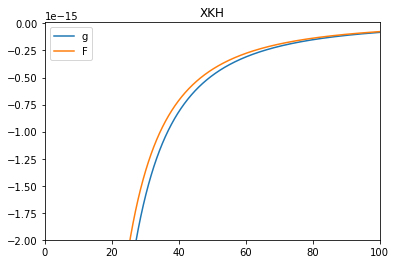

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


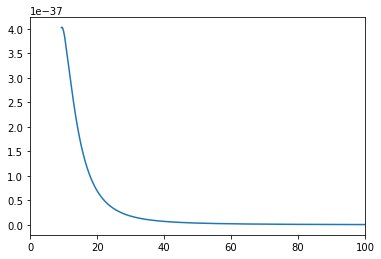

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


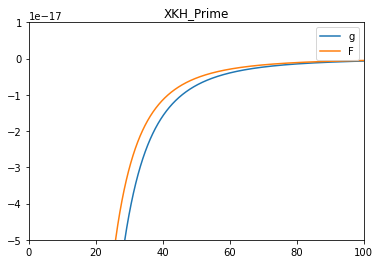

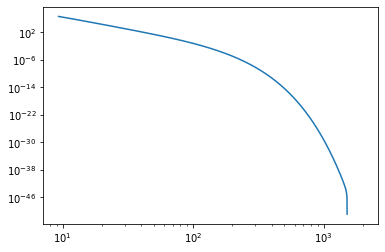

In [72]:
lhs,lhsplot,rlhs,lhsdI = IBarplusminusevenfunctest(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,F_points_gamma_in, z_points_gamma_in)


#D2 is satisfied here for things above 500 M or so  - possible i was starting the integration too close to black hole 

In [64]:
print(rlhs[-26891]/M)
len(rlhs)-26891



502.82558634142634


86152

In [10]:
#print(rlhs[37251]/M)

toplen = 28251 #for 1500M
#toplen = 37251 #for 1344M

In [98]:
#with rstar
#print('right, left')
#print(np.abs(right2),np.abs(3*lhs))
#print('right/left')
#print(np.abs(right2)/np.abs(3*lhs))

#print('right surface, left')
#print(np.abs(right2withsurface),np.abs(3*lhs))
#print('right surface/left')
#print(np.abs(right2withsurface)/np.abs(3*lhs))

right, left
0.000797983159893505 63.799457035668894
right/left
1.2507679484597649e-05
right surface, left
3104.4431168306464 63.799457035668894
right surface/left
48.659397133975915


In [18]:
#with r
print('right, left')
print(np.abs(right2),np.abs(3*lhs))
print('right/left')
print(np.abs(right2)/np.abs(3*lhs))

print('right surface, left')
print(np.abs(right2withsurface),np.abs(3*lhs))
print('right surface/left')
print(np.abs(right2withsurface)/np.abs(3*lhs))

right, left
0.37792268509144156 10384513.848803192
right/left
3.639291069316614e-08
right surface, left
10179987.801214265 10384513.848803192
right surface/left
0.9803047065498883


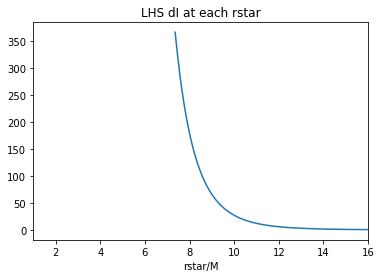

(10384513.848803192+0j)


In [19]:
plt.plot(rlhs[toplen:-1]/M,3*lhsdI)
plt.xlim(.1e1,1.6e1)
plt.xlabel('rstar/M')
plt.title('LHS dI at each rstar')
plt.show()

print(3*lhs) #-> approaches 63? not sure what this is about then 
#tells me that the 500M side is more important.
#check as it goes to 50M? 

In [24]:
rlhs[37251]/M

1344.3994390985824

In [67]:
9.48554894467488e-11/9.098450962247574e-11

1.0425454820862916

In [72]:
len(rlhs)

115403

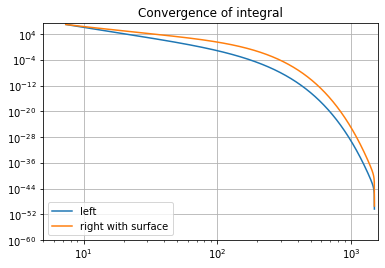

In [20]:
"""
plt.loglog(rlhs[toplen:-1]/M,3*lhsplot,label='left')
#plt.loglog(rlhs[:-1]/M, lhsplot,label='left')
plt.loglog(rlhs[toplen:-1]/M,right2plot,label='right')
plt.legend()
plt.grid()
plt.xlim(50,1.6e3)
plt.ylim(1.e-60,1.e4)
plt.show()
"""

plt.loglog(rlhs[toplen:-1]/M,3*lhsplot,label='left')
#plt.loglog(rlhs[:-1]/M, lhsplot,label='left')
plt.loglog(rlhs[toplen:-1]/M,right2plotwithsurface,label='right with surface')
plt.legend()
plt.grid()
plt.xlim(5,1.6e3)
plt.ylim(1.e-60,4.e7)
plt.title('Convergence of integral')
plt.show()


In [35]:
#start mag dipole work: l=1 parity odd

In [ ]:
# this is matching D20 in paper 1 

In [50]:
k_mag = -2
k_prime_mag = 3
l_mag = 1

In [54]:
print(toplen,lentest)
lentest=115403

28251 115403


In [107]:
#lentest=115703 how to adjust inner bound

In [55]:
tryA2mag=Inp.IfunctionsNoM(X,k_mag,X_prime,k_prime_mag,X_gamma,l_mag,parity,h,h_prime,omega,M,n)


In [109]:
print((omega**3)/(4*np.pi*mu**4))
print(1/(omega**3)*np.pi*mu**4)

1668821335374960.8
1.498063301928175e-16


In [118]:
def rhs_mag(h,h_prime,omega,k,k_prime,M,r_initial, r_final,lentest): 
    
    nu = 1.
    mu =4.1796514508e-23 #planck units 
    lam = 1.
    GC = 1.
    c = 1.
    tol = 1.e-10
    step_size_for_inte = 1*240000
        
    first_coeff = (omega**3)/(144*4*np.pi*(mu**4))
    brac = 0 
    
    #L=j-1/2*s
    
    j=(np.abs(k) - 1/2)
    j_prime = (np.abs(k_prime) - 1/2)
    
    s=0
    s_prime=0
        
    if k !=0:
        s= (k/np.abs(k))
    if k_prime!=0:
        s_prime=k_prime/np.abs(k_prime)
        
    L=j-.5*s
    L_prime=j_prime -.5*s_prime 
    print(L,L_prime)
    
    if np.abs(s-1)<tol  and np.abs(s_prime+1)<tol:
        brac = (L)/(2*L+1)
    elif np.abs(s+1)<tol  and np.abs(s_prime-1)<tol: 
        brac = (L+1)/(2*L+1)
    else: 
        brac=0.
    
    print(first_coeff,brac)

    
    omega_index = round(omega*100*(8*np.pi*M) -1)
    print(omega_index)
    h_index = round(h*100*(8*np.pi*M) -1)
    h_prime_index = round(h_prime*100*(8*np.pi*M) -1)
    
    
    direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'
    if k>0:
        hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')
    else:
        hdu = fits.open(direcElectron+'min'+str(np.abs(k))+'ExtendedOmega.fits')

    r_points = hdu[h_index].data.field('rpoints_up')
     
    F_points_xkh = hdu[h_index].data.field('F_points_up')
    G_points_xkh = hdu[h_index].data.field('G_points_up')
    
    r = np.array([m1.r_star_to_r(x,M,tol) for x in r_points[:lentest]])
    
    
    print(len(r))
    #print(toplen-lentest)
    
    print(direcElectron+'min'+str(np.abs(k_prime))+'ExtendedOmega.fits')
   
    if k_prime>0:
        hdu = fits.open(direcElectron+str(k_prime)+'ExtendedOmega.fits')
    else:
        hdu = fits.open(direcElectron+'min'+str(np.abs(k_prime))+'ExtendedOmega.fits')

    F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_up')
    G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_up')
        
    
    
    
    
    print('rstarmax and rstarmin')
    print(r_points[toplen]/M, r_points[lentest]/M)
    
    dr = r_points[0]-r_points[1]
    inte = 0 
    
    integ = []
    integ_sur =[]
    surface_term =(np.conjugate(F_points_xkh[toplen-1])*F_points_xkh_prime[toplen-1]*r_points[toplen-1] - np.conjugate(F_points_xkh[lentest-1])*F_points_xkh_prime[lentest-1]*r_points[lentest-1])
    
    #with r
    dr = r[0]-r[1]
    print(dr)
    for i in range(toplen,lentest-1,1):
        #dr=r[i]-r[i+1]
        inte += (k+k_prime+1)*.5*(np.conjugate(F_points_xkh[i])*(F_points_xkh_prime[i]) + np.conjugate(F_points_xkh[i+1])*(F_points_xkh_prime[i+1]))*dr
        integ.append(inte)
        
        surface_term_test= (np.conjugate(F_points_xkh[toplen-1])*F_points_xkh_prime[toplen-1]*r_points[toplen-1] - np.conjugate(F_points_xkh[i])*F_points_xkh_prime[i]*r[i])
    
        integ_sur.append(inte - surface_term_test)
 
    
    return np.conjugate(inte)*inte*brac*first_coeff, np.abs(integ*np.conjugate(integ)*brac*first_coeff), np.conjugate(inte-surface_term)*(inte-surface_term)*brac*first_coeff,np.abs(integ_sur*np.conjugate(integ_sur)*brac*first_coeff)


In [119]:
right2_mag,right2plot_mag,right2withsurface_mag,right2plotwithsurface_mag = rhs_mag(h,h_prime,omega,k_mag,k_prime_mag,M,2000.*M, 10.*M,lentest)


2.0 2.0
11589037051215.006 0.6
0
115403
/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/min3ExtendedOmega.fits
rstarmax and rstarmin
1512.6682194509144 9.289955374814078
1.7232701878697984e+19


In [28]:
right2_mag,right2withsurface_mag

((0.7911360677230914+0j), (6.357437035746056+0j))

In [149]:
right2_mag,right2withsurface_mag

((0.7911360677230914+0j), (6.357437035746056+0j))

In [73]:
def IBarplusminusoddfunctest(X,k,X_prime,k_prime,X_gamma,l,h,h_prime,omega,M,F_points_gamma_in,z_points_gamma_in):
        
        #x=0 in, x=1 up
        
        omega_index = round(omega*100*(8*np.pi*M) -1)
        h_index = round(h*100*(8*np.pi*M) -1)
        h_prime_index = round(h_prime*100*(8*np.pi*M) -1)
        print(omega_index, h_index, h_prime_index)
    
        
        nu = 1.
        mu = 4.1796514508e-23
        lam = 1.
        GC = 1.
        c = 1.
        tol = 1.e-10
                
        if X==0:
            uptrue = False
        else:
            uptrue = True
        if X_prime==0:
            uptrue_Xprime = False
        else:
            uptrue_Xprime = True
            
        if X_gamma==0:
            uptrue_Xgamma = False
        else:
            uptrue_Xgamma = True 
        
                    
        direcElectron = '/users/PCON0003/koivuemily/PrimordialBlackHole/ElectronWaveFunctionFits/'
        if k>0:
            hdu = fits.open(direcElectron+str(k)+'ExtendedOmega.fits')
        else:
            hdu = fits.open(direcElectron+'min'+str(np.abs(k))+'ExtendedOmega.fits')
        
        r_points = hdu[h_index].data.field('rpoints_up')
        if uptrue == True: 
            F_points_xkh = hdu[h_index].data.field('F_points_up')
            G_points_xkh = hdu[h_index].data.field('G_points_up')
        else: 
            F_points_xkh = hdu[h_index].data.field('F_points_in')
            G_points_xkh = hdu[h_index].data.field('G_points_in')
             
        if k_prime>0:
            hdu = fits.open(direcElectron+str(k_prime)+'ExtendedOmega.fits')
        else:
            hdu = fits.open(direcElectron+'min'+str(np.abs(k_prime))+'ExtendedOmega.fits')
        
        if uptrue_Xprime == True: 
            F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_up')
            G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_up')
        else: 
            F_points_xkh_prime = hdu[h_prime_index].data.field('F_points_in')
            G_points_xkh_prime = hdu[h_prime_index].data.field('G_points_in')
        
       
        hdu = fits.open(direcElectron+str(np.abs(k))+'ExtendedOmega.fits')
        F_points_xkh_test = hdu[h_prime_index].data.field('F_points_up')
        G_points_xkh_test = hdu[h_prime_index].data.field('G_points_up')
       
        
        
        
        gstar_xkh = np.conjugate(np.array(G_points_xkh))
        g_xprime_kprime_hprime = np.array(G_points_xkh_prime)
        
        fstar_xkh = np.conjugate(np.array(F_points_xkh))
        f_xprime_kprime_hprime = np.array(F_points_xkh_prime)
            
        
        r = np.array([m1.r_star_to_r(x,M,tol) for x in r_points[:lentest]]) #should be same for all I integrals (per M) so can pass to the functions 
        rdependentpart = np.sqrt((1-2*M/r))/(2*r*np.sqrt(2*omega))
        
        
        psi_gammalomega = F_points_gamma_in[::-1][::2]
        psi_gammalomega_prime =z_points_gamma_in[::-1][::2]
        
        psi_gammalomega = psi_gammalomega[:lentest]
        psi_gammalomega_prime =psi_gammalomega_prime[:lentest]
        
        
        g_xkh = np.array(G_points_xkh[:lentest])
        g_xkh_prime = np.array(G_points_xkh_prime[:lentest])
        
        
        gstar_xkh = np.conjugate(np.array(G_points_xkh[:lentest]))
        g_xprime_kprime_hprime = np.array(G_points_xkh_prime[:lentest])
        
        fstar_xkh = np.conjugate(np.array(F_points_xkh[:lentest]))
        f_xkh = np.array(F_points_xkh[:lentest])
        f_xprime_kprime_hprime = np.array(F_points_xkh_prime[:lentest])
        
        
        
        
        df_xkh_dr_star =[]
        df_xkh_prime_dr_star =[]
        dg_xkh_dr_star =[]
        dg_xkh_dr_star_test =[]
        
        r_step = r[toplen]-r[toplen+1]
        rstar_step = r_points[0]-r_points[1] #rstar
        #try taking 4pt derivative 
        #F’(x) ≈ [ -F(x+2h) + 8F(x+h) - 8F(x-h) + F(x-2h)]/(12h)
        
        df_xkh_dr_star_4 = [] 
        df_xkh_dr_4 = []
        df_xkh_dr = []
        for i in range(toplen,lentest-1,1):
            r_step = r[i]-r[i+1]
            df_xkh_dr_star.append((F_points_xkh[i-1]-F_points_xkh[i+1])/(rstar_step*2))
            df_xkh_dr.append((F_points_xkh[i-1]-F_points_xkh[i+1])/(r_step*2))
            df_xkh_dr_star_4.append(-1*(F_points_xkh[i-2]- 8*F_points_xkh[i-1]+8*F_points_xkh[i+1] -F_points_xkh[i+2])/(rstar_step*12))
            df_xkh_dr_4.append(1*(F_points_xkh[i-2]- 8*F_points_xkh[i-1]+8*F_points_xkh[i+1] -F_points_xkh[i+2])/(r_step*12))
            
            dg_xkh_dr_star.append((G_points_xkh[i-1]-G_points_xkh[i+1])/(rstar_step*2))
            df_xkh_prime_dr_star.append((F_points_xkh_prime[i-1]-F_points_xkh_prime[i+1])/(rstar_step*2))
            dg_xkh_dr_star_test.append((np.conjugate(G_points_xkh_test[i-1])-np.conjugate(G_points_xkh_test[i+1]))/(rstar_step*2)) 
        print(r_step)
        
        
        plt.plot(r_points[toplen:lentest-1]/M,k*g_xkh[toplen:-1]/r_points[toplen:lentest-1] + dg_xkh_dr_star)
        plt.xlim(0,100)
        plt.plot()
        plt.show()
        
        

        plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*F_points_xkh[toplen:lentest-1]/r[toplen:lentest-1] - df_xkh_dr_star_4)/(2*mu),label='F')
        plt.legend()
        plt.title('XKH rstar D2 not adjusted')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,100)
        plt.show()
        
        
        plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*(1-M/r[toplen:lentest-1])*F_points_xkh[toplen:lentest-1]/r[toplen:lentest-1] - df_xkh_dr_star)/(h+mu*(1-M/r[toplen:lentest-1])),label='F 2')
        plt.plot(r_points[toplen:lentest-1]/M, (k*(1-M/r[toplen:lentest-1])*F_points_xkh[toplen:lentest-1]/r[toplen:lentest-1] - df_xkh_dr_star_4)/(h+mu*(1-M/r[toplen:lentest-1])),label='F 4')
        plt.legend()
        plt.title('XKH rstar D2 adjusted for inclusion of (1-M/r)')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,100)
        plt.show()
        
        
        """plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*(1-M/r[toplen:lentest-1])*F_points_xkh[toplen:lentest-1]/r[toplen:lentest-1] - df_xkh_dr)/(h+mu*(1-M/r[toplen:lentest-1])),label='F')
        plt.legend()
        plt.title('XKH rstar D2 adjusted dr derivative instead')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,100)
        plt.show()"""
        
        plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*(1-M/r[toplen:lentest-1])*F_points_xkh[toplen:lentest-1]/r[toplen:lentest-1] - df_xkh_dr_star )/(h+mu*(1-M/r[toplen:lentest-1])),label='F')
        plt.legend()
        plt.title('D1 right adjusted')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,50)
        plt.show()
        
        plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*F_points_xkh[toplen:lentest-1]/r[toplen:lentest-1] - df_xkh_dr_star )/(h+mu*(1-M/r[toplen:lentest-1])),label='F')
        plt.legend()
        plt.title('D1 right')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,100)
        plt.show()
        
        
        plt.plot(r_points[toplen:lentest]/M,F_points_xkh[toplen:lentest],label='F')
        plt.plot(r_points[toplen:lentest-1]/M, (k*G_points_xkh[toplen:lentest-1]/r[toplen:lentest-1] + dg_xkh_dr_star )/(h-mu*(1-M/r[toplen:lentest-1])),label='g')
        plt.legend()
        plt.title('D1 left')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,20)
        plt.show()
        
        #plt.plot(r_points[toplen:lentest]/M,F_points_xkh[toplen:lentest],label='F')
        plt.plot(r_points[toplen:lentest-1]/M, (-k*G_points_xkh[toplen:lentest-1]/r[toplen:lentest-1])/(h-mu*(1-M/r[toplen:lentest-1])),label='gpart')
        plt.plot(r_points[toplen:lentest-1]/M, (dg_xkh_dr_star)/(h-mu*(1-M/r[toplen:lentest-1])),label='dg part')
        plt.legend()
        plt.title('D1 left terms test')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,20)
        plt.show()
        
        #plt.plot(r_points[toplen:lentest]/M,F_points_xkh[toplen:lentest],label='F')
        plt.plot(r_points[toplen:lentest-1]/M, (-k*G_points_xkh[toplen:lentest-1]/r[toplen:lentest-1])/(h-mu*(1-M/r[toplen:lentest-1])) - F_points_xkh[toplen:lentest-1],label='gpart')
        plt.plot(r_points[toplen:lentest-1]/M, (dg_xkh_dr_star)/(h-mu*(1-M/r[toplen:lentest-1])),label='dg part')
        plt.legend()
        plt.title('D1 left rewrite')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,20)
        plt.show()
        
       
        plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*F_points_xkh[toplen:lentest-1]*np.sqrt(1-2*M/r[toplen:lentest-1])/r[toplen:lentest-1] - df_xkh_dr_star -mu*np.sqrt(1-2*M/r[toplen:lentest-1])*G_points_xkh[toplen:lentest-1])/h,label='complicated')
        plt.legend()
        plt.title('35')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,100)
        plt.show()
        
        
        plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g rk4')
        #plt.plot(r_points[toplen:lentest]/M,F_points_xkh[toplen:lentest],label='F rk4')
        plt.plot(r_points[toplen:lentest-1]/M, (k*F_points_xkh[toplen:lentest-1]*np.sqrt(1-2*M/r[toplen:lentest-1])/r[toplen:lentest-1] - df_xkh_dr_star_4)/(h+mu*np.sqrt(1-2*M/r[toplen:lentest-1])),label='complicated')
        plt.legend()
        plt.title('35 4pt method')
        #plt.ylim(1.e-18,5.e-18)
        plt.xlim(0,100)
        plt.show()
        
        
         
        """plt.plot(r_points[toplen:lentest]/M,G_points_xkh[toplen:lentest],label='g')
        plt.plot(r_points[toplen:lentest-1]/M, (k*np.conjugate(G_points_xkh_test[toplen:lentest-1])/r[toplen:lentest-1] - dg_xkh_dr_star)/(2*mu),label='F')
        plt.legend()
        plt.title('XKH rstar but try with F_x,-k,-h = Gstar_x,k,h')
        #plt.ylim(-20.e-10,5.e-18)
        plt.xlim(0,100)
        plt.show()
        """
        


        print(len(psi_gammalomega))
        line = (fstar_xkh * g_xprime_kprime_hprime + gstar_xkh*f_xprime_kprime_hprime)*psi_gammalomega*rdependentpart
        print(len(line))
        print(toplen-lentest)
        print(line[0])
        print(r_points[toplen]/M,r_points[lentest-1]/M)
        #midpoint method
        print(len(r))
        inte = 0.
        rstar_step = r_points[0]-r_points[1] #switched order to get positive steps in
        print(rstar_step)
        integ=[]
        dIs = []
        for index in range(toplen,lentest-1,1):
            dI = .5*(line[index]+line[index+1])*rstar_step
            inte += dI
            dIs.append(dI)
            integ.append(inte)
        print(tryA2mag.coeff_no_m_odd)
        print(len(integ))
        #integ= integ*2
        integ=np.array(integ)
        print(len(integ))
        dIs = np.array(dIs)
        return inte*tryA2mag.coeff_no_m_odd*np.conjugate(inte*tryA2mag.coeff_no_m_odd),integ*tryA2mag.coeff_no_m_odd *np.conjugate(integ*tryA2mag.coeff_no_m_odd),r,dIs*tryA2mag.coeff_no_m_odd *np.conjugate(dIs*tryA2mag.coeff_no_m_odd)
    
    

In [74]:
k_mag=-2

0 95 97
1.2555212239034909e+19


/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


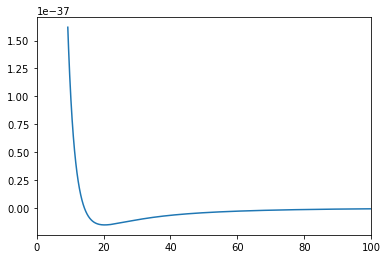

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


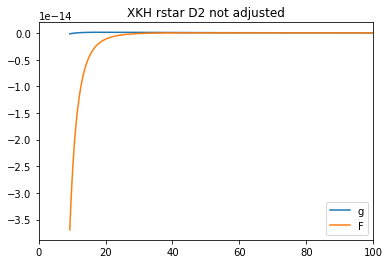

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


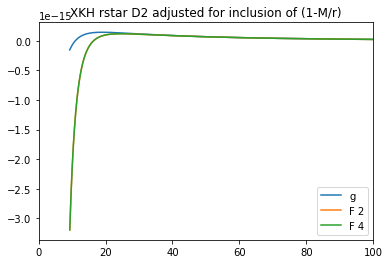

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


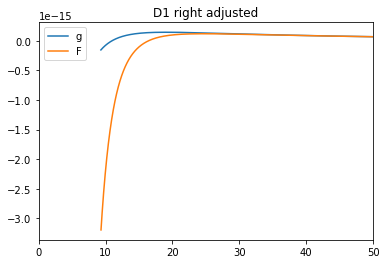

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


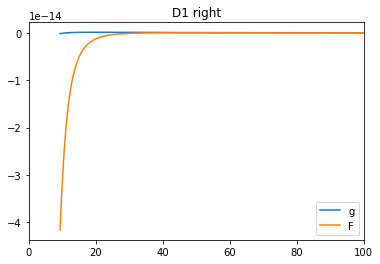

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


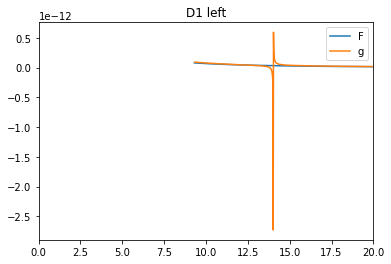

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


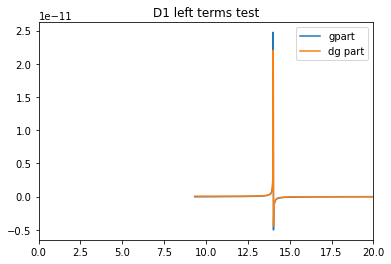

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


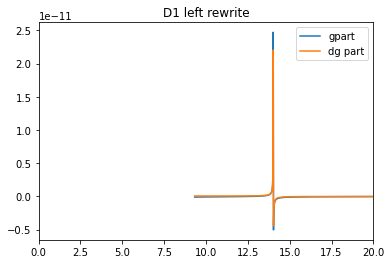

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


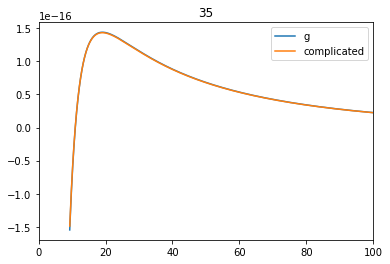

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


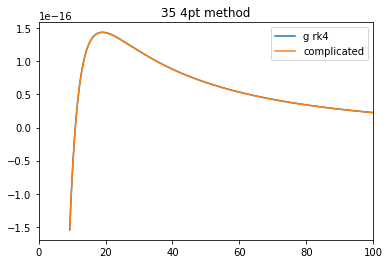

115403
115403
-87152
(-7.968447708782465e-76+3.684744672741788e-76j)
1512.6682194509144 9.307205446689425
115403
1.725007187534676e+19
1.3903438383976781e+22
87151
87151


In [75]:
lhs_mag,lhsplot_mag,rlhs_mag,lhsdI_mag = IBarplusminusoddfunctest(X,k_mag,X_prime,k_prime_mag,X_gamma,l_mag,h,h_prime,omega,M,F_points_gamma_in, z_points_gamma_in)


In [38]:
lhs_mag

(219.70832264570578+0j)

In [150]:
print(right2withsurface_mag,lhs_mag)

print(right2withsurface_mag/lhs_mag)
print(lhs_mag/right2withsurface_mag)


(6.357437035746056+0j) (219.70832264570578+0j)
(0.028935804339091167+0j)
(34.55926050236101+0j)


In [30]:
print(3*16*3*right2withsurface_mag,3*lhs_mag)
print(144*right2withsurface_mag/3/lhs_mag)

#basically the right side is off by a factor of 144 and i am not sure how to reconsile that

(682.3708264232226+0j) (659.1249679371174+0j)
(1.035267755914115+0j)


In [141]:
len(lhsplot_mag),len(right2plotwithsurface_mag),len(rlhs_mag)

(87151, 87151, 115403)

In [32]:
print(3*16*3)

144


/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


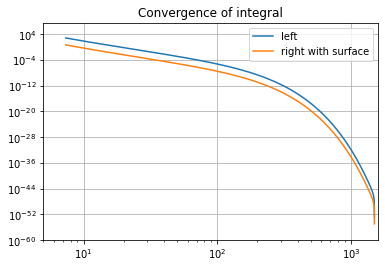

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


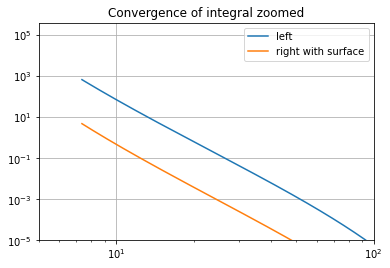

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


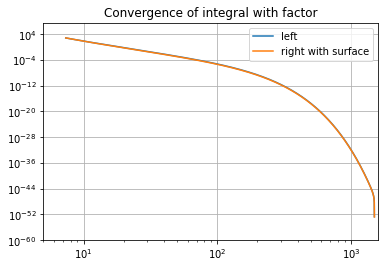

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


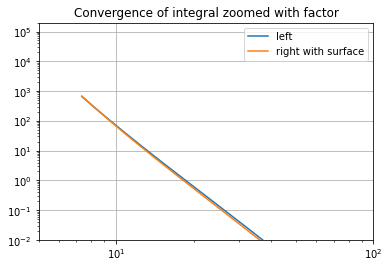

In [31]:
plt.loglog(rlhs_mag[toplen:-1]/M,3*lhsplot_mag,label='left')
#plt.loglog(rlhs[:-1]/M, lhsplot,label='left')
plt.loglog(rlhs_mag[toplen:-1]/M,right2plotwithsurface_mag,label='right with surface')
plt.legend()
plt.grid()
plt.xlim(5,1.6e3)
plt.ylim(1.e-60,4.e7)
plt.title('Convergence of integral')
plt.show()

plt.loglog(rlhs_mag[toplen:-1]/M,3*lhsplot_mag,label='left')
#plt.loglog(rlhs[:-1]/M, lhsplot,label='left')
plt.loglog(rlhs_mag[toplen:-1]/M,right2plotwithsurface_mag,label='right with surface')
plt.legend()
plt.grid()
plt.xlim(5,100)
plt.ylim(1.e-5,4.e5)
plt.title('Convergence of integral zoomed')
plt.show()


#with bonus 144 factor 
plt.loglog(rlhs_mag[toplen:-1]/M,3*lhsplot_mag,label='left')
#plt.loglog(rlhs[:-1]/M, lhsplot,label='left')
plt.loglog(rlhs_mag[toplen:-1]/M,144*right2plotwithsurface_mag,label='right with surface')
plt.legend()
plt.grid()
plt.xlim(5,1.6e3)
plt.ylim(1.e-60,4.e7)
plt.title('Convergence of integral with factor')
plt.show()

plt.loglog(rlhs_mag[toplen:-1]/M,3*lhsplot_mag,label='left')
#plt.loglog(rlhs[:-1]/M, lhsplot,label='left')
plt.loglog(rlhs_mag[toplen:-1]/M,144*right2plotwithsurface_mag,label='right with surface')
plt.legend()
plt.grid()
plt.xlim(5,100)
plt.ylim(1.e-2,2.e5)
plt.title('Convergence of integral zoomed with factor')
plt.show()


In [114]:
def Pi_no_m(k,k_prime,l):
        
        s=0
        s_prime=0
        
        if k !=0:
            s= (k/np.abs(k))
        if k_prime!=0:
            s_prime=k_prime/np.abs(k_prime)
        
        j=(np.abs(k) - 1/2)
        
        j_prime = (np.abs(k_prime) - 1/2)
        
        
        w= float(wigner_3j(j,j_prime,l,-1/2,-1/2,1))
        #print(s,s_prime,j,j_prime)
        #print(np.sqrt((2*j+1)*(2*j_prime+1)*(2*l+1)/(4*np.pi)))
        #print((1-s*s_prime*(-1)**(j-j_prime+l))) #gives 0
        x = s*np.sqrt((2*j+1)*(2*j_prime+1)*(2*l+1)/(4*np.pi))*w*(1-s*s_prime*(-1)**(j-j_prime+l))
        
        return x


In [131]:
Pi_no_m(-3,4,l)

1.2794617117375386

In [141]:
print(k_mag,k_prime_mag,l)

2 -3 1


In [140]:
Pi_no_m(k_mag,k_prime_mag,l_mag)

1.0704744696916626

In [135]:
k_mag+k_prime_mag+1

0

In [21]:
nu = 1.

mu = 4.1796514508e-23    #in planck units
lam = 1.
GC = 1.
M = 1.e21
c = 1.
tol = 1.e-10

r_initial = 2000.*M
r_final= -70.*M

T = 1/(8*np.pi*M)
k = 2.
h = np.linspace(.01*T,20.*T,2000)


h[0]

3.978873577297383e-25

In [22]:
EWF = Inp.ElectronWaveFunction(nu, -1*h[0], k, mu, M, lam, GC, c, tol)
r_points_negh, F_points_negh, G_points_negh = EWF.RK_4(r_initial, r_final, 240000, up = True)
r_points_in_negh, F_points_in_negh, G_points_in_negh = EWF.RK_4(r_final, r_initial, 240000, up = False)
R_negh,T_negh,delta_negh = EWF.get_R_and_T_coeff(r_points_negh,F_points_negh,G_points_negh,r_points_in_negh,F_points_in_negh,G_points_in_negh)


/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:100: RuntimeWarning: invalid value encountered in sqrt
  self.v = np.sqrt(h**2 -mu**2)/h


2e+24
(0.9905252532754157+0j)
(0.9905252532754157+0j)
-7e+22


/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:219: RuntimeWarning: invalid value encountered in sqrt
  A = 2*np.complex(0,-1)*np.sqrt(self.h)*np.exp(np.complex(0,1)*self.h*r_points[-1])/(np.complex(0,-1)*F_points[-1]+G_points[-1])


0j
(nan+nanj)


/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:238: RuntimeWarning: invalid value encountered in sqrt
  delta = np.complex(0,-1)*.5*np.log((np.complex(0,1)*F_points_up[-1]+G_points_up[-1])/(2*np.complex(0,1)*np.sqrt(self.h)*np.exp(np.complex(0,-1)*self.h*r_up[-1])))
/users/PCON0003/koivuemily/PrimordialBlackHole/I_functions_class.py:238: RuntimeWarning: invalid value encountered in cdouble_scalars
  delta = np.complex(0,-1)*.5*np.log((np.complex(0,1)*F_points_up[-1]+G_points_up[-1])/(2*np.complex(0,1)*np.sqrt(self.h)*np.exp(np.complex(0,-1)*self.h*r_up[-1])))


In [8]:
EWF = Inp.ElectronWaveFunction(nu, h[0], -k, mu, M, lam, GC, c, tol)
r_points_h, F_points_h, G_points_h = EWF.RK_4(r_initial, r_final, 240000, up = True)
r_points_in_h, F_points_in_h, G_points_in_h = EWF.RK_4(r_final, r_initial, 240000, up = False)
R_h,T_h,delta_h = EWF.get_R_and_T_coeff(r_points_h,F_points_h,G_points_h,r_points_in_h,F_points_in_h,G_points_in_h)


2e+24
(1.0095653762418009+0j)
(1.4274445495834027e-52-3.566309288902077e-54j)
(1.441098593764476e-52-3.6004223790450546e-54j)
-7e+22
0j
(-0.024978676368835488+3.960006298280381e-17j)


In [40]:
df_drstar_negh = []
dg_drstar_negh = []
dg_drstar_h = []
drstar = r_points_h[0]-r_points_h[1]
for i in range(1,len(r_points_h)-1,1):
    df_drstar_negh = (aup_negh*F_points_negh[i-1]-aup_negh*F_points_negh[i+1])/2/drstar
    dg_drstar_negh = (aup_negh*G_points_negh[i-1]-aup_negh*G_points_negh[i+1])/2/drstar
    dg_drstar_h = (G_points_h[i-1]-G_points_h[i+1])/2/drstar

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


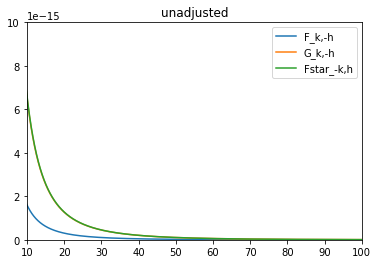

/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/users/PCON0003/koivuemily/.conda/envs/local1/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


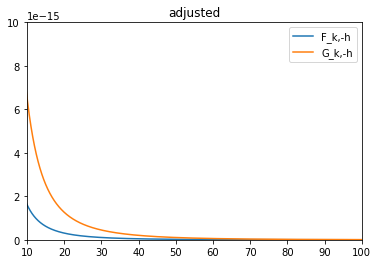

In [46]:
import matplotlib.pyplot as plt 
plt.plot(r_points_negh[1:-1]/M, 1/2/mu*(k*aup_negh*np.array(F_points_negh[1:-1]))/r_points_negh[1:-1] - df_drstar_negh,label='F_k,-h')
plt.plot(r_points_negh/M,aup_negh*np.array(G_points_negh),label='G_k,-h')
plt.plot(r_points_negh/M,np.conjugate(F_points_h),label='Fstar_-k,h')
plt.xlim(10,100)
plt.ylim(0,1e-14)
plt.title('unadjusted')
plt.legend()
plt.show()


plt.plot(r_points_negh[1:-1]/M, 1/2/(-h[0]+mu*(1-M/r_points_negh[1:-1]))*(k*(1-M/r_points_negh[1:-1])*aup_negh*np.array(F_points_negh[1:-1]))/r_points_negh[1:-1] - df_drstar_negh,label='F_k,-h')
plt.plot(r_points_negh/M,aup_negh*np.array(G_points_negh),label='G_k,-h')
#plt.plot(r_points_negh/M,np.conjugate(F_points_h),label='Fstar_-k,h')
plt.xlim(10,100)
plt.ylim(0,1e-14)
plt.legend()
plt.title('adjusted')
plt.show()

plt.plot(r_points_negh[1:-1]/M, 1/2/(-h[0]+mu*(1-M/r_points_negh[1:-1]))*(k*(1-M/r_points_negh[1:-1])*aup_negh*np.array(F_points_negh[1:-1]))/r_points_negh[1:-1] - df_drstar_negh,label='F_k,-h')
plt.plot(r_points_negh/M,aup_negh*np.array(G_points_negh),label='G_k,-h')
#plt.plot(r_points_negh/M,np.conjugate(F_points_h),label='Fstar_-k,h')
plt.xlim(10,100)
plt.ylim(0,1e-14)
plt.legend()
plt.title('adjusted')
plt.show()



#plt.plot(r_points_h,np.conjugate(F_points_h))

In [13]:
np.sqrt(-2)

/tmp/slurmtmp.15592300/ipykernel_245735/2418628377.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-2)


nan

In [18]:
aup_posh = (1.4274445495834027e-52-3.566309288902077e-54j)
aup_negh = 2*np.sqrt(h[0])*np.exp(complex(0,-1)*h[0]*r_points_h[-1])/(complex(0,-1)*np.conjugate(G_points_h[-1]/aup_posh)+ np.conjugate(F_points_h[-1]/aup_posh))
print(np.conjugate(aup_posh))
print(aup_negh)

(1.4274445495834027e-52+3.566309288902077e-54j)
(1.4274445495834027e-52+3.566309288902077e-54j)
